# Figure 2, Panel C (Left)

In [148]:
import h5py
import matplotlib.animation as ani
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import os
# from directory_paths import SAVE_DIR, PARENT_DIR

In [149]:
SAVE_DIR = "/media/data/merkourios"
DATA_DIR = "/media/data/merkourios/data_for_figs"

In [150]:
flag3d_ground_truth = np.load(os.path.join(DATA_DIR, "flag_5_ground_truth.npy")).T
flag3d_predictions = np.load(os.path.join(DATA_DIR, "flag_5_prediction.npy")).T
flag3d_spindles = np.load(os.path.join(DATA_DIR, "flag_5_spindles.npy"))
flag3d_shoulder = np.load(os.path.join(DATA_DIR, "flag_shoulder_5.npy")).T
flag3d_elbow = np.load(os.path.join(DATA_DIR, "flag_elbow_5.npy")).T
flag3d_wrist = np.load(os.path.join(DATA_DIR, "flag_wrist_5.npy")).T
flag3d_endeffector_coords = flag3d_wrist

pcr_ground_truth = np.load(os.path.join(DATA_DIR, "rand_89_ground_truth.npy")).T
pcr_predictions = np.load(os.path.join(DATA_DIR, "rand_89_prediction.npy")).T
pcr_spindles = np.load(os.path.join(DATA_DIR, "rand_89_spindles.npy"))
pcr_endeffector_coords = pcr_ground_truth[:3]
pcr_shoulder = np.array([[0], [0], [0]])
pcr_elbow = np.array([[12], [-27], [-8]])

## PCR

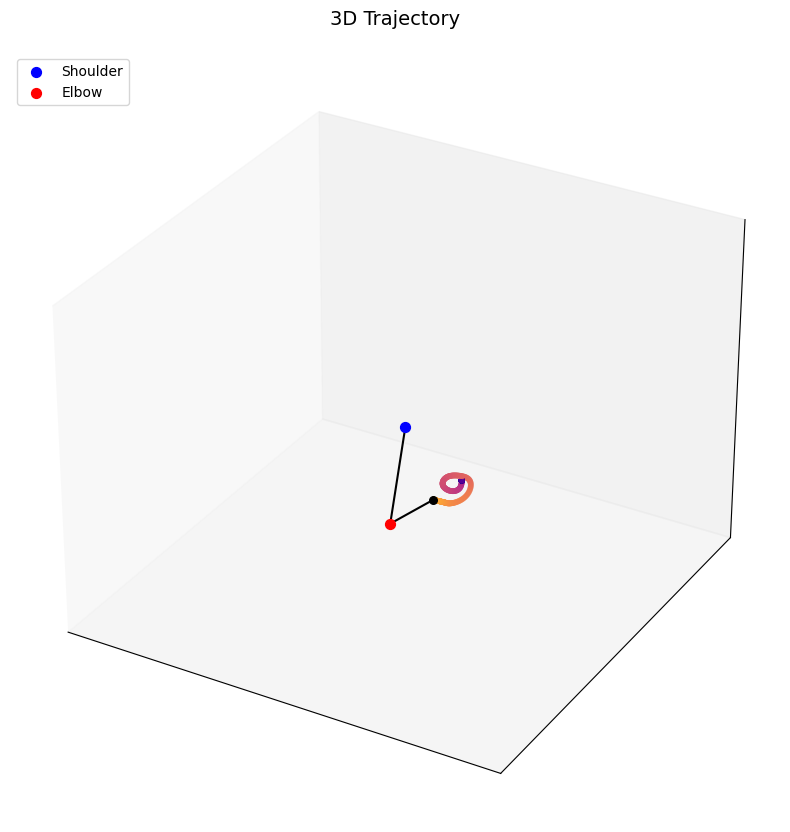

In [151]:
from matplotlib.colors import Normalize

# PCR example

fig = plt.figure(figsize=(10, 10))
gs = fig.add_gridspec(2, 2)

x_min = -50
x_max = 50
y_min = -50
y_max = 50
z_min = -50
z_max = 50

time = np.linspace(0.0, 4.8, pcr_endeffector_coords.shape[1])

cmap = plt.cm.plasma  # You can choose any colormap
norm = Normalize(vmin=0, vmax=len(time))

# Generate alpha values increasing from 0 to 1
alpha_values = np.linspace(0, 1, len(time))

# Map indices to colors in the colormap
colors = [cmap(norm(i)) for i in range(len(time))]

# Adjust alpha of each color
colors_with_alpha = [(r, g, b, alpha) for (r, g, b, _), alpha in zip(colors, alpha_values)]

ax = fig.add_subplot(111, projection="3d")
ax.scatter(pcr_endeffector_coords[0, :], pcr_endeffector_coords[1, :], pcr_endeffector_coords[2, :], c=colors_with_alpha, s=10)
ax.scatter(pcr_endeffector_coords[0, -1], pcr_endeffector_coords[1, -1], pcr_endeffector_coords[2, -1], c='black', s=30)

ax.scatter(0, 0, 0, c='blue', s=50, label='Shoulder')

# ax.scatter(30, 0, 0, c='red', s=50, label='Elbow')
ax.scatter(pcr_elbow[0, -1], pcr_elbow[1, -1], pcr_elbow[2, -1], c='red', s=50, label='Elbow')

# Connect the shoulder and elbow
ax.plot([pcr_shoulder[0, -1], pcr_elbow[0, -1]], [pcr_shoulder[1, -1], pcr_elbow[1, -1]], [pcr_shoulder[2, -1], pcr_elbow[2, -1]], c='black')
# Connect the elbow and endeffector
ax.plot([pcr_elbow[0, -1], pcr_endeffector_coords[0, -1]], [pcr_elbow[1, -1], pcr_endeffector_coords[1, -1]], [pcr_elbow[2, -1], pcr_endeffector_coords[2, -1]], c='black')

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_zlim(z_min, z_max)

ax.set_title("Endeffector coordinates")

# Add grid lines for better readability
ax.grid(True, linestyle=".", alpha=1)

# Add a title and a legend
ax.set_title("3D Trajectory", fontsize=14, pad=20)
ax.legend(loc="upper left", fontsize=10)

# Reduce clutter by hiding pane spines
ax.xaxis.pane.fill = True
ax.yaxis.pane.fill = True
ax.zaxis.pane.fill = True

# Remove ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

plt.show()

## FLAG3D

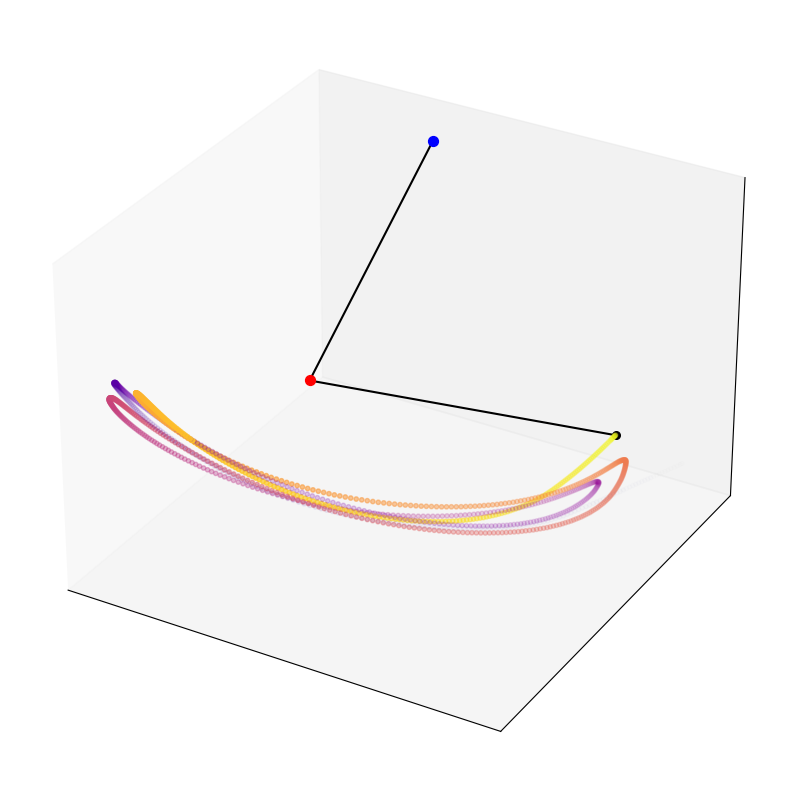

In [152]:
# FLAG3D example

fig = plt.figure(figsize=(10, 10))
gs = fig.add_gridspec(2, 2)

x_min = 10
x_max = 40
y_min = -30
y_max = 100
z_min = 0
z_max = 30

time = np.linspace(0.0, 4.8, flag3d_endeffector_coords.shape[1])

cmap = plt.cm.plasma  # You can choose any colormap
norm = Normalize(vmin=0, vmax=len(time))

# Generate alpha values increasing from 0 to 1
alpha_values = np.linspace(0, 1, len(time))

# Map indices to colors in the colormap
colors = [cmap(norm(i)) for i in range(len(time))]

# Adjust alpha of each color
colors_with_alpha = [(r, g, b, alpha) for (r, g, b, _), alpha in zip(colors, alpha_values)]

ax = fig.add_subplot(111, projection="3d")
ax.scatter(flag3d_endeffector_coords[0, :], flag3d_endeffector_coords[1, :], flag3d_endeffector_coords[2, :], c=colors_with_alpha, s=10)
ax.scatter(flag3d_endeffector_coords[0, -1], flag3d_endeffector_coords[1, -1], flag3d_endeffector_coords[2, -1], c='black', s=30)
ax.scatter(flag3d_shoulder[0, -1], flag3d_shoulder[1, -1], flag3d_shoulder[2, -1], c='blue', s=50)
ax.scatter(flag3d_elbow[0, -1], flag3d_elbow[1, -1], flag3d_elbow[2, -1], c='red', s=50)

# Connect the shoulder and elbow
ax.plot([flag3d_shoulder[0, -1], flag3d_elbow[0, -1]], [flag3d_shoulder[1, -1], flag3d_elbow[1, -1]], [flag3d_shoulder[2, -1], flag3d_elbow[2, -1]], c='black')

# Connect the elbow and endeffector
ax.plot([flag3d_elbow[0, -1], flag3d_endeffector_coords[0, -1]], [flag3d_elbow[1, -1], flag3d_endeffector_coords[1, -1]], [flag3d_elbow[2, -1], flag3d_endeffector_coords[2, -1]], c='black')

# Add grid lines for better readability
ax.grid(True, linestyle=".", alpha=1)

# Reduce clutter by hiding pane spines
ax.xaxis.pane.fill = True
ax.yaxis.pane.fill = True
ax.zaxis.pane.fill = True

# Remove ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

plt.show()